Steps:
Preprocess data
- Handle missing values - Either drop rows/cols, impute missing values, use most frequent category, label as unknown.
- Encode cat variables (Label and one_hot_encoding)
- Apply scaling/normalization where necessary
- Transform dates into useful time intervals
- Detect and handle outliers
- Generates interaction terms of new features


Note:
Label encoders are used when you have ordinal variables or if variables are binary. Eg: Low, medium, high > 0,1,2
One-hot encoders are used for nominal variables (no odering)

Note: 
Train test split first or scale first? 
Train_test_split is typically done before scaling. This avoids data leakage, where information from the test set is used in training, causing the model to perform unrealistically well on the test data. 





In [82]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



#Read CSV file
df = pd.read_csv('Kaggle/vehicle_maintenance_data_trucks_v3_withreportednobattery_noiseadded.csv')

#Create Labels and Input Data
y = df["Need_Maintenance"]
X = df.drop("Need_Maintenance",axis=1)

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [83]:
#Inspect X_train
X_train.head()

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition
5968,Truck,52071.21727,Average,5,8,Petrol,Manual,800,119726.44700,20/8/2023,23/11/2025,Second,22635.625970,1,0,13.072454,Worn Out,Worn Out
344,Truck,58284.59114,Poor,1,2,Diesel,Manual,1500,85798.74502,8/10/2023,26/6/2025,First,5443.890737,6,1,19.323862,Worn Out,New
7273,Truck,42632.18318,Average,5,5,Electric,Manual,2000,21969.58586,5/6/2023,18/11/2025,Third,16727.229740,4,3,15.379458,New,Good
4898,Truck,75931.60534,Average,3,10,Diesel,Automatic,1000,86339.45254,24/6/2023,3/12/2025,Second,23839.895060,5,2,17.739402,Worn Out,Good
7181,Truck,43558.36147,Poor,1,9,Electric,Manual,1500,104558.53500,18/5/2023,24/2/2026,First,11904.123800,2,1,12.031250,Good,New


In [84]:
#Inspect X_test
X_test

,Vehicle_Model,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Fuel_Type,Transmission_Type,Engine_Size,Odometer_Reading,Last_Service_Date,Warranty_Expiry_Date,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition
3534,Truck,76487.69008,Poor,5,3,Electric,Automatic,2000,117494.305800,12/5/2023,9/3/2025,Second,17980.43102,1,0,14.079213,Worn Out,Good
1618,Truck,36600.34384,Average,5,5,Diesel,Manual,1500,137318.859400,30/10/2023,7/11/2024,First,17175.11364,8,1,19.473107,New,New
8100,Truck,50137.13000,Average,3,4,Petrol,Automatic,1500,43779.291280,23/6/2023,29/11/2025,Second,13988.06267,6,2,10.997331,New,Worn Out
2851,Truck,72779.42959,Poor,2,7,Electric,Manual,1000,51470.886690,9/11/2023,4/9/2024,First,27382.79393,1,1,10.754516,New,Good
5498,Truck,38834.06791,Average,3,6,Petrol,Automatic,800,5792.075322,17/1/2024,3/4/2025,Second,15252.02573,10,2,17.748830,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,Truck,69694.54861,Average,4,3,Electric,Manual,1000,113125.257800,28/8/2023,25/5/2024,Third,21260.36319,8,1,16.362817,Good,Good
2753,Truck,38558.49899,Good,3,1,Electric,Manual,2500,69164.710320,8/8/2023,14/11/2024,Third,13042.59914,10,3,15.647344,Worn Out,Worn Out
3254,Truck,48102.88815,Poor,3,9,Diesel,Manual,1500,41009.486140,18/11/2023,4/3/2025,Second,10242.22205,5,3,16.976283,Good,New
8141,Truck,58130.55737,Good,0,8,Diesel,Automatic,2500,79370.706850,11/8/2023,12/12/2025,Second,23676.76097,10,2,19.538010,New,New


In [85]:
#convert last service date and warranty expiry date into date time
X_train["Last_Service_Date"] = pd.to_datetime(X_train["Last_Service_Date"],format="%d/%m/%Y")
X_train["Warranty_Expiry_Date"] = pd.to_datetime(X_train["Warranty_Expiry_Date"],format="%d/%m/%Y")

#Preprocess data such that it is express as warranty days remaining/days since last service. 
X_train["Days_since_last_service"] = (pd.Timestamp.today() - X_train["Last_Service_Date"]).dt.days
X_train["Warranty Days remaining"] = (X_train["Warranty_Expiry_Date"] - pd.Timestamp.today()).dt.days



X_test["Last_Service_Date"] = pd.to_datetime(X_test["Last_Service_Date"],format="%d/%m/%Y")
X_test["Warranty_Expiry_Date"] = pd.to_datetime(X_test["Warranty_Expiry_Date"],format="%d/%m/%Y")

X_test["Days_since_last_service"] = (pd.Timestamp.today() - X_test["Last_Service_Date"]).dt.days
X_test["Warranty Days remaining"] = (X_test["Warranty_Expiry_Date"] - pd.Timestamp.today()).dt.days


In [86]:
#Drop original last_service_date and warranty_expiry date cols
#Drop Vehicle Model as all truck
X_train = X_train.drop(columns = ['Last_Service_Date','Warranty_Expiry_Date','Vehicle_Model'], axis = 1)
X_test = X_test.drop(columns = ['Last_Service_Date','Warranty_Expiry_Date','Vehicle_Model'], axis = 1)


In [87]:
#Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include = ['int','float']).columns

In [88]:
oneHotEncoder = OneHotEncoder()

#Convert ordinal data into numerical categories
# pd.Categorical(df["Tire_Condition"],categories=["Worn Out","Good","New"],ordered=True) adds ordering to data Worn Out < Good < New but does not convert into binary
X_train["Tire_Condition"] = pd.Categorical(X_train["Tire_Condition"],categories=["Worn Out","Good","New"],ordered=True).codes
X_train["Brake_Condition"] = pd.Categorical(X_train["Brake_Condition"],categories=["Worn Out","Good","New"],ordered=True).codes
# X_train["Battery_Status"] = pd.Categorical(X_train["Battery_Status"],categories=["Weak","Good","New"],ordered=True).codes
X_train["Owner_Type"] = pd.Categorical(X_train["Owner_Type"],categories=["First","Second","Third"],ordered=True).codes
X_train["Maintenance_History"] = pd.Categorical(X_train["Maintenance_History"],categories=["Poor","Average","Good"],ordered=True).codes

X_test["Tire_Condition"] = pd.Categorical(X_test["Tire_Condition"],categories=["Worn Out","Good","New"],ordered=True).codes
X_test["Brake_Condition"] = pd.Categorical(X_test["Brake_Condition"],categories=["Worn Out","Good","New"],ordered=True).codes
# X_test["Battery_Status"] = pd.Categorical(X_test["Battery_Status"],categories=["Weak","Good","New"],ordered=True).codes
X_test["Owner_Type"] = pd.Categorical(X_test["Owner_Type"],categories=["First","Second","Third"],ordered=True).codes
X_test["Maintenance_History"] = pd.Categorical(X_test["Maintenance_History"],categories=["Poor","Average","Good"],ordered=True).codes


# "Battery_Status"
labelEncodedCols = ["Tire_Condition", "Brake_Condition","Owner_Type","Maintenance_History"]

#Essentially Transmission type and fuel type.
oneHotEncodedCols = list(set(categorical_cols) - set(labelEncodedCols))
X_train = pd.get_dummies(X_train,columns=oneHotEncodedCols,drop_first=True)
X_test = pd.get_dummies(X_test,columns=oneHotEncodedCols,drop_first=True)






In [89]:
# df["Tire_Condition"]
# df["Brake_Condition"]
# df["Battery_Status"]
# df["Owner_Type"]
# df["Maintenance_History"]

In [90]:
X_train.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Days_since_last_service,Warranty Days remaining,Transmission_Type_Manual,Fuel_Type_Electric,Fuel_Type_Petrol
5968,52071.21727,1,5,8,800,119726.44700,1,22635.625970,1,0,13.072454,0,0,429,396,True,False,True
344,58284.59114,0,1,2,1500,85798.74502,0,5443.890737,6,1,19.323862,0,2,380,246,True,False,False
7273,42632.18318,1,5,5,2000,21969.58586,2,16727.229740,4,3,15.379458,2,1,505,391,True,True,False
4898,75931.60534,1,3,10,1000,86339.45254,1,23839.895060,5,2,17.739402,0,1,486,406,False,False,False
7181,43558.36147,0,1,9,1500,104558.53500,0,11904.123800,2,1,12.031250,1,2,523,489,True,True,False


In [91]:
X_test.head()

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Days_since_last_service,Warranty Days remaining,Transmission_Type_Manual,Fuel_Type_Electric,Fuel_Type_Petrol
3534,76487.69008,0,5,3,2000,117494.305800,1,17980.43102,1,0,14.079213,0,1,529,137,False,True,False
1618,36600.34384,1,5,5,1500,137318.859400,0,17175.11364,8,1,19.473107,2,2,358,15,True,False,False
8100,50137.13000,1,3,4,1500,43779.291280,1,13988.06267,6,2,10.997331,2,0,487,402,False,False,True
2851,72779.42959,0,2,7,1000,51470.886690,0,27382.79393,1,1,10.754516,2,1,348,-49,True,True,False
5498,38834.06791,1,3,6,800,5792.075322,1,15252.02573,10,2,17.748830,1,1,279,162,False,False,True


In [92]:
numerical_df = X_train[numerical_cols]

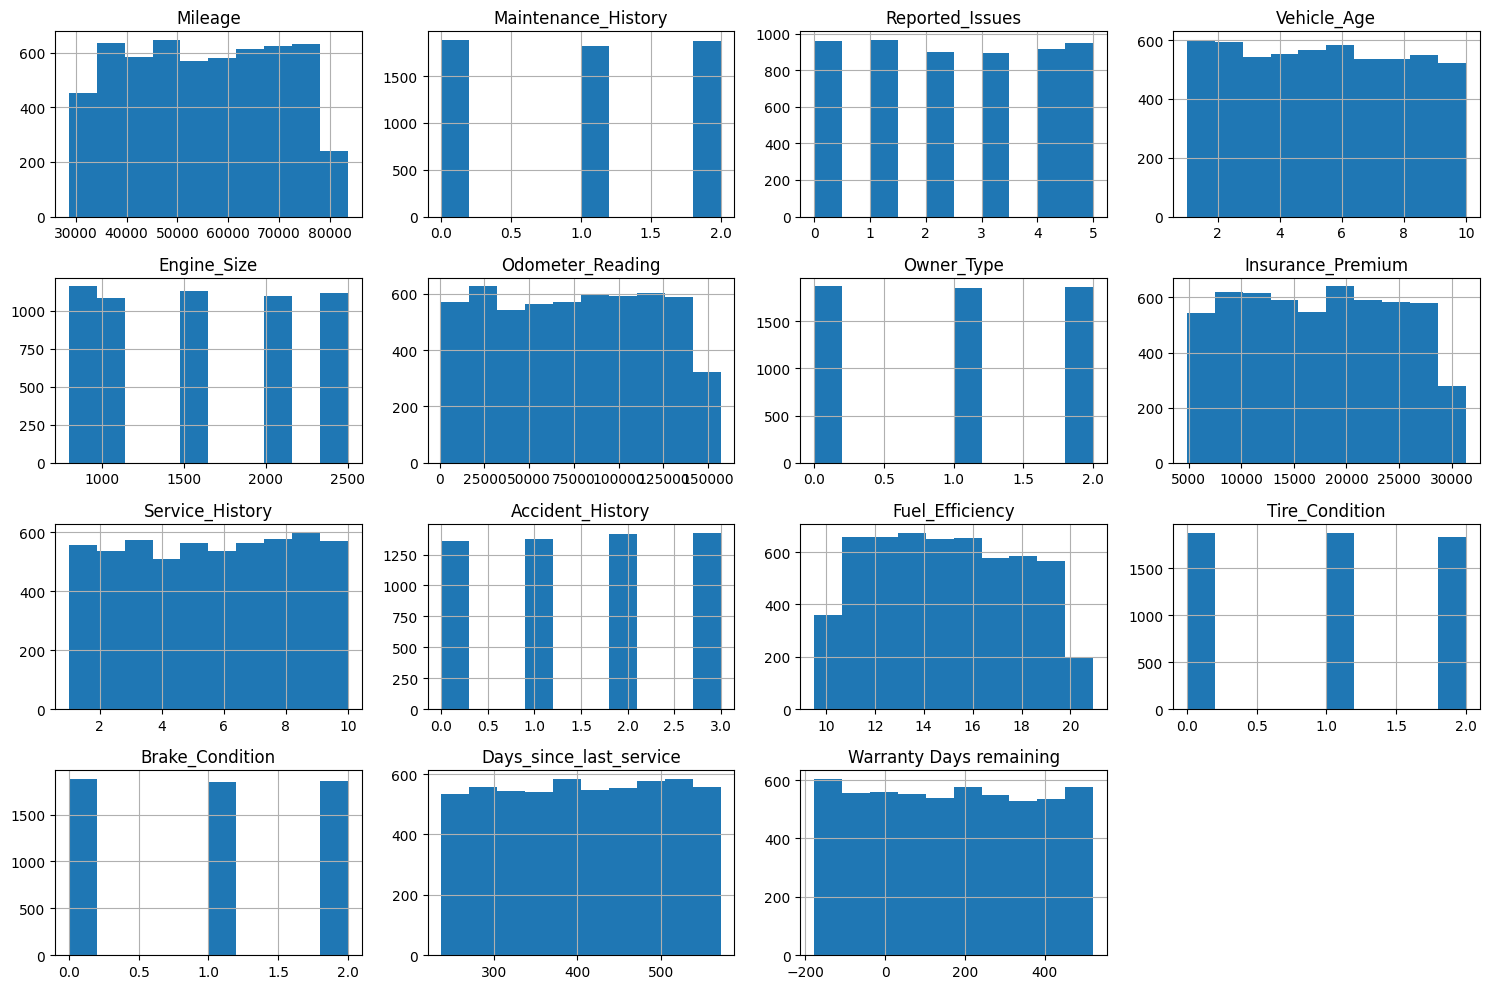

In [93]:
# import seaborn as sns
#Notice that the data does not follow normal distribution. 

X_train.hist(figsize=(15,10))
plt.tight_layout()



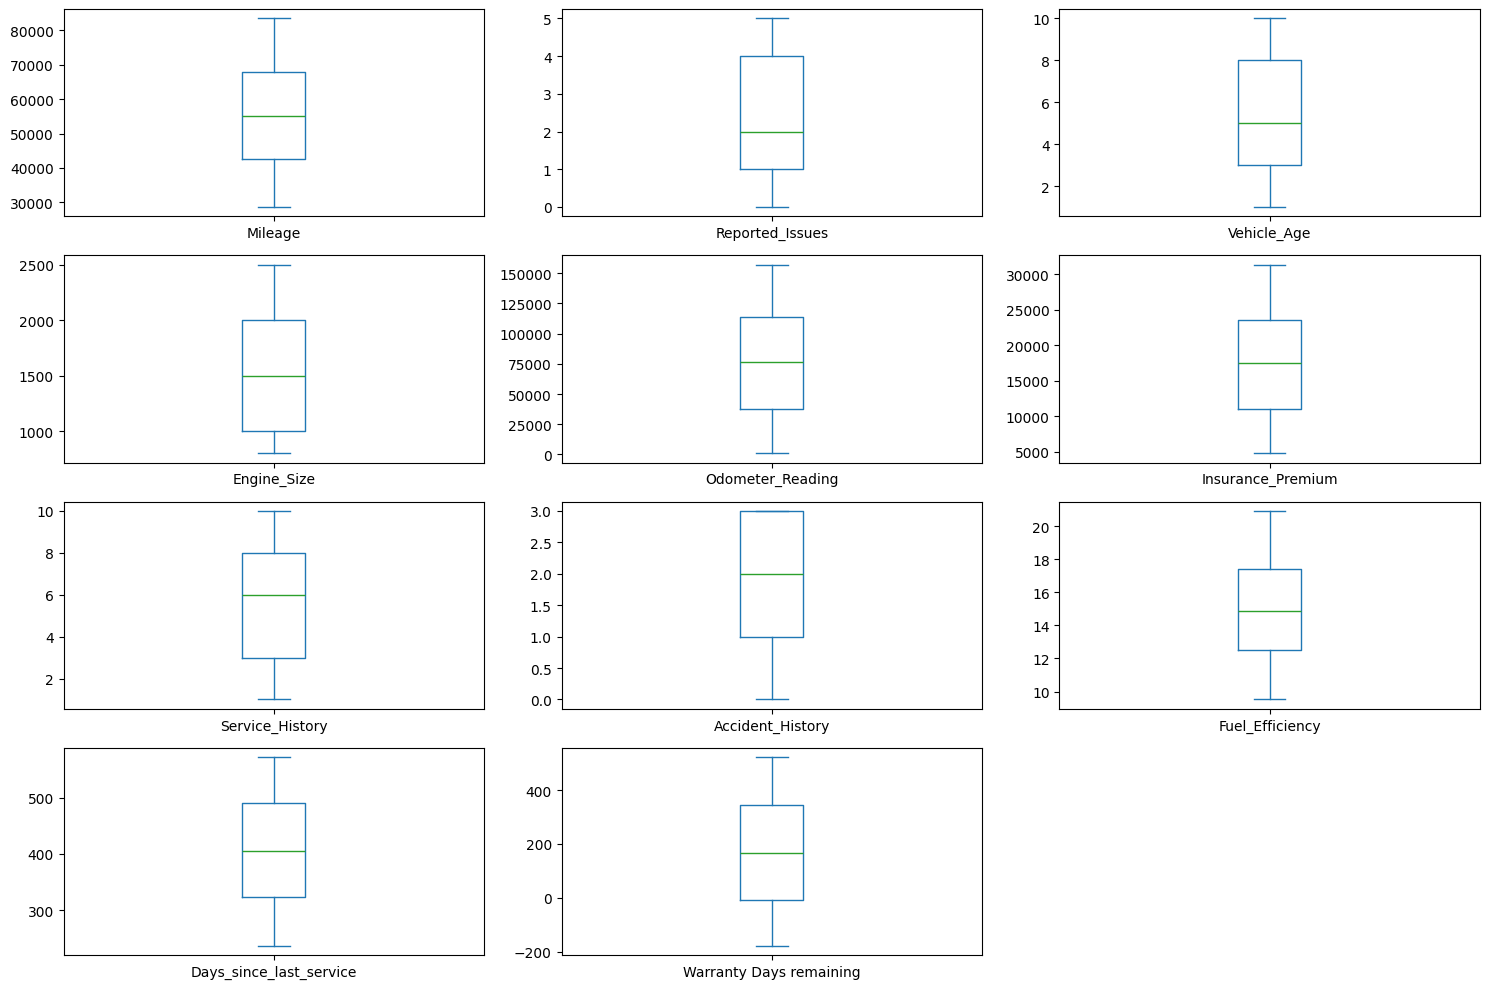

In [94]:
# Create boxplots for all numerical columns to check for outliers. Data suggests no outliers. 
numerical_data = X_train[numerical_cols]
numerical_data.plot(kind='box', subplots=True, layout=(4, 3), figsize=(15, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [95]:
X_train

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Days_since_last_service,Warranty Days remaining,Transmission_Type_Manual,Fuel_Type_Electric,Fuel_Type_Petrol
5968,52071.21727,1,5,8,800,119726.44700,1,22635.625970,1,0,13.072454,0,0,429,396,True,False,True
344,58284.59114,0,1,2,1500,85798.74502,0,5443.890737,6,1,19.323862,0,2,380,246,True,False,False
7273,42632.18318,1,5,5,2000,21969.58586,2,16727.229740,4,3,15.379458,2,1,505,391,True,True,False
4898,75931.60534,1,3,10,1000,86339.45254,1,23839.895060,5,2,17.739402,0,1,486,406,False,False,False
7181,43558.36147,0,1,9,1500,104558.53500,0,11904.123800,2,1,12.031250,1,2,523,489,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,77043.20057,2,5,6,800,109145.32600,2,12255.269290,9,0,13.605212,0,1,511,241,True,False,False
5191,37904.01568,2,3,2,1000,41270.83160,0,13203.577940,5,0,16.542335,2,2,511,-160,False,False,False
5390,63323.11587,0,5,10,800,136682.88370,0,23515.814760,8,3,14.063973,2,1,443,21,False,False,True
860,53674.50371,1,1,9,2000,25200.25923,2,18553.517970,6,1,16.558832,2,1,237,-156,False,True,False


In [96]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Mileage,5579.0,55168.984523,14638.314381,28639.681880,42520.234860,55036.884490,67880.214070,83509.789850
Maintenance_History,5579.0,0.997849,0.820364,0.000000,0.000000,1.000000,2.000000,2.000000
Reported_Issues,5579.0,2.481090,1.724310,0.000000,1.000000,2.000000,4.000000,5.000000
Vehicle_Age,5579.0,5.403298,2.875777,1.000000,3.000000,5.000000,8.000000,10.000000
Engine_Size,5579.0,1555.475892,629.369660,800.000000,1000.000000,1500.000000,2000.000000,2500.000000
Odometer_Reading,5579.0,75893.465230,43330.426162,1015.574025,37551.490585,76622.324700,113318.953650,156994.643000
Owner_Type,5579.0,0.999642,0.817959,0.000000,0.000000,1.000000,2.000000,2.000000
Insurance_Premium,5579.0,17413.507522,7222.000578,4823.226335,11110.161575,17489.120450,23543.723330,31349.067500
Service_History,5579.0,5.564438,2.887628,1.000000,3.000000,6.000000,8.000000,10.000000
Accident_History,5579.0,1.521957,1.117357,0.000000,1.000000,2.000000,3.000000,3.000000


In [97]:
X_train_cols = X_train.columns
print(X_train_cols)
# scaler = MinMaxScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_train = pd.DataFrame(data=X_train,columns=X_train_cols)
X_test = pd.DataFrame(data=X_test,columns=X_train_cols)

Index(['Mileage', 'Maintenance_History', 'Reported_Issues', 'Vehicle_Age',
       'Engine_Size', 'Odometer_Reading', 'Owner_Type', 'Insurance_Premium',
       'Service_History', 'Accident_History', 'Fuel_Efficiency',
       'Tire_Condition', 'Brake_Condition', 'Days_since_last_service',
       'Warranty Days remaining', 'Transmission_Type_Manual',
       'Fuel_Type_Electric', 'Fuel_Type_Petrol'],
      dtype='object')


In [98]:
X_test

,Mileage,Maintenance_History,Reported_Issues,Vehicle_Age,Engine_Size,Odometer_Reading,Owner_Type,Insurance_Premium,Service_History,Accident_History,Fuel_Efficiency,Tire_Condition,Brake_Condition,Days_since_last_service,Warranty Days remaining,Transmission_Type_Manual,Fuel_Type_Electric,Fuel_Type_Petrol
3534,76487.69008,0,5,3,2000,117494.305800,1,17980.43102,1,0,14.079213,0,1,529,137,False,True,False
1618,36600.34384,1,5,5,1500,137318.859400,0,17175.11364,8,1,19.473107,2,2,358,15,True,False,False
8100,50137.13000,1,3,4,1500,43779.291280,1,13988.06267,6,2,10.997331,2,0,487,402,False,False,True
2851,72779.42959,0,2,7,1000,51470.886690,0,27382.79393,1,1,10.754516,2,1,348,-49,True,True,False
5498,38834.06791,1,3,6,800,5792.075322,1,15252.02573,10,2,17.748830,1,1,279,162,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4366,69694.54861,1,4,3,1000,113125.257800,2,21260.36319,8,1,16.362817,1,1,421,-151,True,True,False
2753,38558.49899,2,3,1,2500,69164.710320,2,13042.59914,10,3,15.647344,0,0,441,22,True,True,False
3254,48102.88815,0,3,9,1500,41009.486140,1,10242.22205,5,3,16.976283,1,2,339,132,True,False,False
8141,58130.55737,2,0,8,2500,79370.706850,1,23676.76097,10,2,19.538010,2,2,438,415,False,False,False


In [99]:
for col in X_test.columns:
    print(col)

Mileage
Maintenance_History
Reported_Issues
Vehicle_Age
Engine_Size
Odometer_Reading
Owner_Type
Insurance_Premium
Service_History
Accident_History
Fuel_Efficiency
Tire_Condition
Brake_Condition
Days_since_last_service
Warranty Days remaining
Transmission_Type_Manual
Fuel_Type_Electric
Fuel_Type_Petrol


In [100]:
# param_grid = {
#     'n_estimators': [200,400],         # Number of trees in the forest
#     'max_depth': [10, 20],             # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required to be at a leaf node
# }

# rf = RandomForestClassifier(n_estimators=100,random_state=42)

# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
#                            cv=5, verbose=2)

# grid_search.fit(X_train, y_train)

# best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s


KeyboardInterrupt: 

In [101]:
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [105]:
X_train.shape

(5579, 18)

In [102]:
#Random Forest Classifier
rf = RandomForestClassifier(n_estimators=400,random_state=42,max_depth=20,min_samples_leaf=1,min_samples_split=10)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(rf.score(X_test,y_test))
acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f"Accuracy: {acc:.2f}")
print(classification_report(y_test,y_pred))

print(len(rf.feature_names_in_))
print(len(rf.feature_importances_))

pd.DataFrame(index=rf.feature_names_in_,data=rf.feature_importances_,columns=['importance']).sort_values(by="importance",ascending=False)



0.8814114223353947
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       527
           1       0.93      0.92      0.93      2222

    accuracy                           0.88      2749
   macro avg       0.81      0.82      0.81      2749
weighted avg       0.88      0.88      0.88      2749

18
18


,importance
Reported_Issues,0.269806
Brake_Condition,0.195037
Service_History,0.077600
Odometer_Reading,0.051385
Insurance_Premium,0.049993
Warranty Days remaining,0.049863
Maintenance_History,0.048314
Days_since_last_service,0.048191
Fuel_Efficiency,0.047613
Mileage,0.047608


In [111]:
import pickle

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

with open('rf_columns.pkl', 'wb') as columns_file:
    pickle.dump(X_train.columns, columns_file)

In [112]:
with open('randomforest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

with open('rf_columns.pkl', 'rb') as columns_file:
    model_columns = pickle.load(columns_file)

In [113]:
y_pred = loaded_model.predict(X_test)


acc = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f"Accuracy: {acc:.2f}")
print(classification_report(y_test,y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       527
           1       0.93      0.92      0.93      2222

    accuracy                           0.88      2749
   macro avg       0.81      0.82      0.81      2749
weighted avg       0.88      0.88      0.88      2749



In [74]:
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],            # Inverse of regularization strength (smaller C -> stronger regularization)
#     'penalty': ['l1', 'l2', 'elasticnet', None],   # Regularization type
#     'max_iter': [100, 200, 300],              # Maximum number of iterations
# }

# lr = LogisticRegression(random_state=42)

# grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
#                            cv=5, verbose=2)

# grid_search.fit(X_train, y_train)

In [72]:
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'C': 10, 'max_iter': 300, 'penalty': 'l2'}


In [80]:

#Non convergence occuring because of multicollinearity
lr = LogisticRegression(solver='saga')
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

print(lr.score(X_test,y_test))
acc_lr = accuracy_score(y_true=y_test,y_pred=y_pred_lr)
print(f"Accuracy: {acc_lr:.2f}")
print(classification_report(y_test,y_pred_lr))



0.8082939250636595
Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       527
           1       0.81      1.00      0.89      2222

    accuracy                           0.81      2749
   macro avg       0.40      0.50      0.45      2749
weighted avg       0.65      0.81      0.72      2749



c:\Users\KJ\anaconda3\envs\trashenv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KJ\anaconda3\envs\trashenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KJ\anaconda3\envs\trashenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\KJ\anaconda3\envs\trashenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and b

In [81]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_true=y_test,y_pred=y_pred_svm)
print(f"Accuracy: {acc_svm:.2f}")
print(classification_report(y_test,y_pred_svm))


Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.43      0.01      0.01       527
           1       0.81      1.00      0.89      2222

    accuracy                           0.81      2749
   macro avg       0.62      0.50      0.45      2749
weighted avg       0.74      0.81      0.72      2749

